## CALIFORNIA HOUSING DATA FROM THE 1990 CENSUS

Creating regressions that predict the median house value in California communities.


DATA DESCRIPTION INFO LINK:<br>
[https://www.kaggle.com/datasets/camnugent/california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
# Actual & Target Values
actual_target_num = np.array([20, 15, 12, 17, 15, 14, 19, 17])
predicted_target_num = np.array([19, 12, 12, 19, 17, 17, 17, 18])

# Compute Error Metrics
errors = actual_target_num - predicted_target_num
squared_errors = errors ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

# RMSE Using sklearn
rmse_sklearn = np.sqrt(mean_squared_error(actual_target_num, predicted_target_num))

# Display Results
print("ERRORS:", errors)
print("SQUARED ERRORS:", squared_errors)
print("8 MSE:", mse)
print("RMSE:", rmse)
print("SKLEARN RMSE:", rmse_sklearn)

ERRORS: [ 1  3  0 -2 -2 -3  2 -1]
SQUARED ERRORS: [1 9 0 4 4 9 4 1]
8 MSE: 4.0
RMSE: 2.0
SKLEARN RMSE: 2.0


In [3]:
# Get California Housing Data
from sklearn.datasets import fetch_california_housing

HousingCal = fetch_california_housing()

# 20640 rows × 9 columns
# MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal
df_housing = pd.DataFrame(data=HousingCal['data'], columns=HousingCal['feature_names'])
df_housing[HousingCal['target_names'][0]] = HousingCal['target']

df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


SIZE OF DATAFRAME: 185760

FIRST FEW ROWS OF THE DATAFRAME:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  



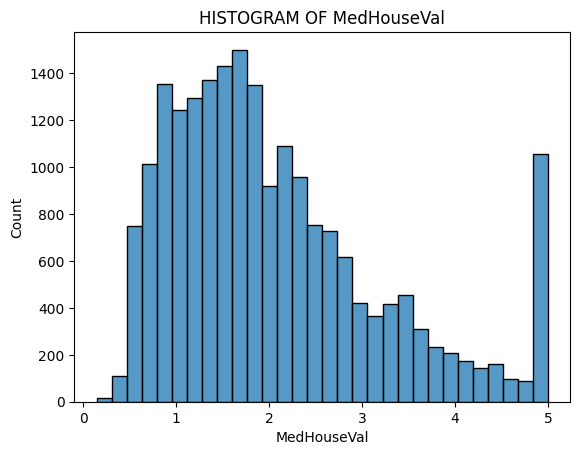

In [4]:
# Size of DataFrame
print(f"SIZE OF DATAFRAME: {df_housing.size}")

# First Few Rows of the DataFrame
print(f"\nFIRST FEW ROWS OF THE DATAFRAME:\n{df_housing.head()}\n")
df_housing.head()

# Histogram for Column "MedHouseVal"
sns.histplot(df_housing['MedHouseVal'], bins=30, edgecolor='black');
plt.title('HISTOGRAM OF MedHouseVal')
plt.show()


In [5]:
# Checking "MedHouseVal" for Values Less than or Equal to 5
count_less_than_5 = df_housing[df_housing["MedHouseVal"] >= 5]["MedHouseVal"].count()
print("MEDHOUSEVAL VALUES >= 5: ", count_less_than_5)

MEDHOUSEVAL VALUES >= 5:  992


MEDHOUSEVAL VALUES >= 5:  0


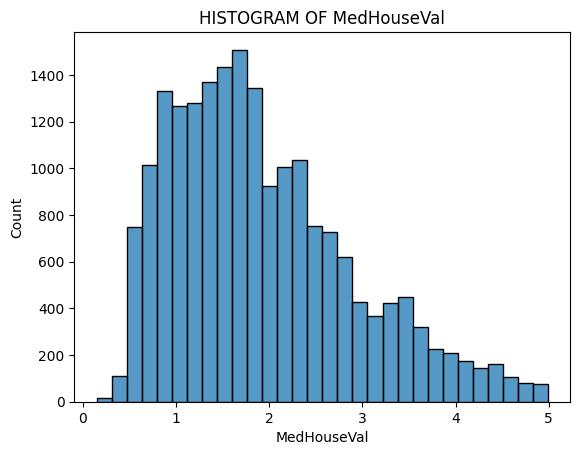

In [6]:
# Remove the Houses Where `MedHouseVal` is Greater or Equal to 5
df_housing = df_housing.drop(df_housing[df_housing.MedHouseVal >= 5].index)

# After Dropping Columsn, Checking for Values in "MedHouseVal" that are Less than or Equal to 5
count_less_than_5 = df_housing[df_housing["MedHouseVal"] >= 5]["MedHouseVal"].count()
print("MEDHOUSEVAL VALUES >= 5: ", count_less_than_5)

# Histogram for Column "MedHouseVal"
sns.histplot(df_housing['MedHouseVal'], bins=30, edgecolor='black');
plt.title('HISTOGRAM OF MedHouseVal')
plt.show()

In [7]:
# Remove `Latitude` and `Longitude`
df_housing = df_housing.drop(["Latitude", "Longitude"], axis=1)

# Showing the Remaining Columsn to Confirm "Latitude" & "Longitude" Columsn were Dropped
df_housing.columns.tolist()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'MedHouseVal']

In [8]:
# Split Data into Features & Target
X = df_housing.drop('MedHouseVal', axis=1)
y = df_housing['MedHouseVal']

# Split Features & Target into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.15, random_state = 42)

# Resetting the Index
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

# Normalize the Training & Test Features Based on the Training Data
znormalizer = StandardScaler()
znormalizer.fit(X_train)
X_train_znorm = pd.DataFrame(znormalizer.transform(X_train))
X_test_znorm = pd.DataFrame(znormalizer.transform(X_test))


print(f"TRAINING DATA ROWS: {X_train.shape[0]}")
print(f"TEST DATA ROWS: {X_test.shape[0]}")
print(f"\nTRAINING DATA COLUMNS: {X_train.shape[1]}")
print(f"TEST DATA COLUMNS: {X_test.shape[1]}")

TRAINING DATA ROWS: 16700
TEST DATA ROWS: 2948

TRAINING DATA COLUMNS: 6
TEST DATA COLUMNS: 6


In [9]:
# Training a Linear Regression Algorithm
linreg = LinearRegression()
linreg.fit(X_train_znorm, y_train)

# Predicting the Median House Prices for Trainging & Test Data Sets
y_train_pred = linreg.predict(X_train_znorm)
y_test_pred = linreg.predict(X_test_znorm)

print(f"PREDICTIONS ON TRAINING SET: {y_train_pred}")
print(f"\nPREDICTIONS ON TEST SET: {y_test_pred}")

PREDICTIONS ON TRAINING SET: [2.0473256  2.09986533 1.547272   ... 1.8442963  1.81632894 1.62352587]

PREDICTIONS ON TEST SET: [2.87353813 2.43959388 2.01643355 ... 2.53232568 3.26792369 1.46580573]


In [10]:
# Calculate and Report RMSE
# Calculate the Error Rate
from sklearn.metrics import mean_squared_error

# RMSE for Training & Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("TRAINING RSME: {:5.5f}.".format(rmse_train))
print("TEST RSME: {:5.5f}.".format(rmse_test))

TRAINING RSME: 0.68548.
TEST RSME: 0.69420.


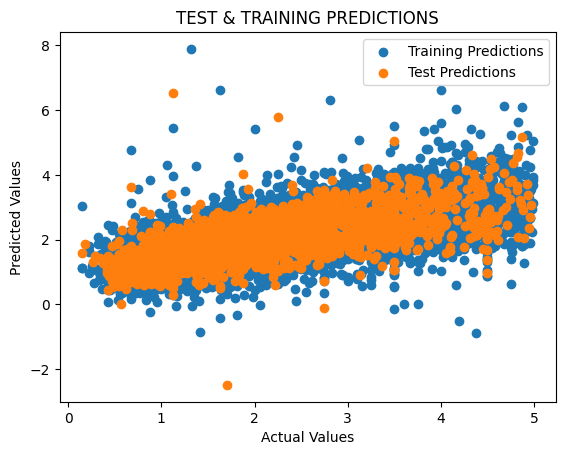

In [11]:
# Scatter Plot of the Benchmark Predictions Against the Actual Values
# Scatter Plot for Both Training & Test Predictions
plt.scatter(y_train, y_train_pred, label='Training Predictions')
plt.scatter(y_test, y_test_pred, label='Test Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('TEST & TRAINING PREDICTIONS')
plt.legend()
plt.show()

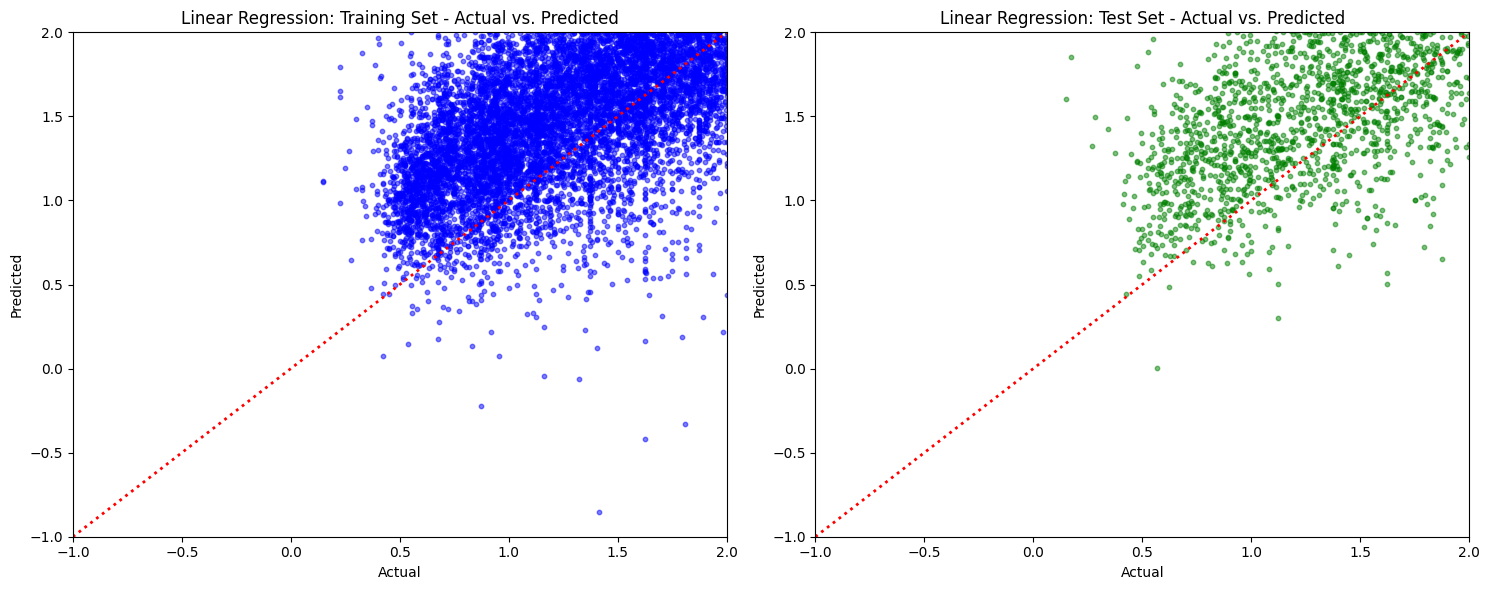

In [12]:
# Scatter Plot of Benchmark Predictions Against the Actual Values
plt.figure(figsize=(15, 6))

# Training Scatter Plot
plottingData_train = pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).sort_values(by='y_train')

plt.subplot(1, 2, 1)
plt.plot([-1, 2], [-1, 2], c='red', lw=2, ls=':')
plt.scatter(plottingData_train['y_train'], plottingData_train['y_train_pred'], s=10, c='blue', alpha=0.5)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.title('Linear Regression: Training Set - Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


# Test Scatter Plot
plottingData_test = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred}).sort_values(by='y_test')

plt.subplot(1, 2, 2)
plt.plot([-1, 2], [-1, 2], c='red', lw=2, ls=':')
plt.scatter(plottingData_test['y_test'], plottingData_test['y_test_pred'], s=10, c='green', alpha=0.5)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.title('Linear Regression: Test Set - Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [13]:
# Train Model
#Training Lasso Model w/ "alpha=0.000001"
lasso = Lasso(alpha=0.000001)
lasso.fit(X_train_znorm, y_train)
y_lasso_pred = lasso.predict(X_test_znorm)


# Compare Models
#Comparing Lasso & Linear Regression Model to See if they are Identical
comparison_result = np.allclose(y_test_pred, y_lasso_pred)
print(f"ARE LASSO & LINEAR REGRESSION MODELS PRACTICALLY IDENTICAL: {comparison_result}")

ARE LASSO & LINEAR REGRESSION MODELS PRACTICALLY IDENTICAL: False


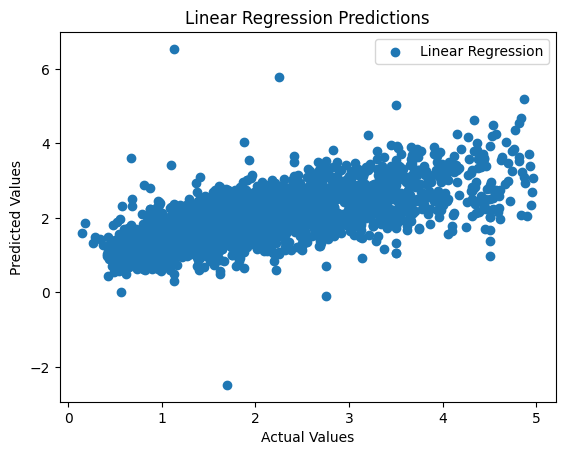

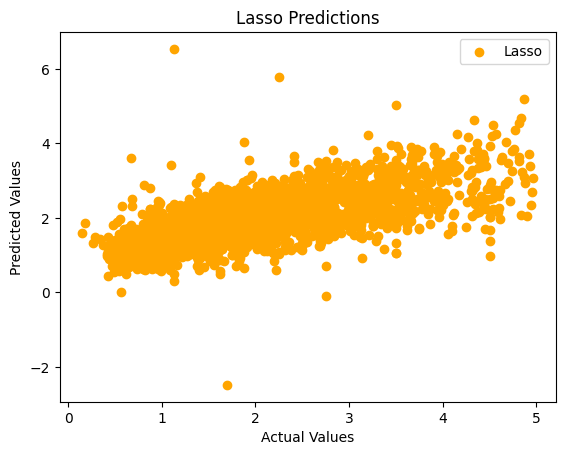

In [14]:
# Scatter plot for Linear Regression predictions
plt.scatter(y_test, y_test_pred, label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Scatter plot for Lasso predictions
plt.scatter(y_test, y_lasso_pred, label='Lasso', color='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Predictions')
plt.legend()
plt.show()


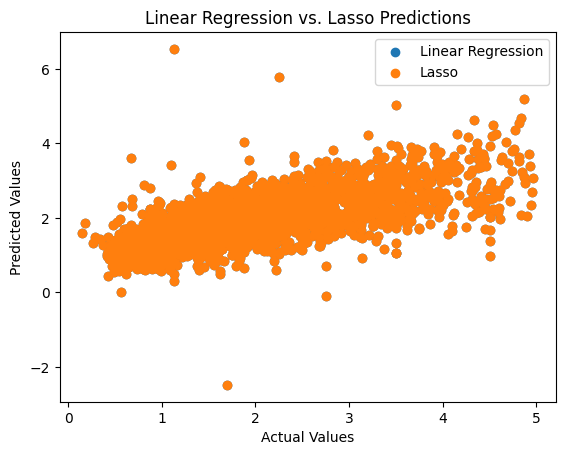

In [15]:
# Showing Scatter Plot for both Linear Regression & Lasso
plt.scatter(y_test, y_test_pred, label='Linear Regression')
plt.scatter(y_test, y_lasso_pred, label='Lasso')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression vs. Lasso Predictions')
plt.legend()
plt.show()

In [16]:
# Compairing the Test Prediction Between Linear Regression & Lasso
mse_linear_regression = mean_squared_error(y_test, y_test_pred)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
print("MSE Linear Regression:", mse_linear_regression)
print("MSE Lasso:", mse_lasso)

MSE Linear Regression: 0.48190699023510364
MSE Lasso: 0.4819069521466288


In [17]:
# The Alpha Column Contains the Values we want to Iterate Over
# The Other Columns are for Storing the Coefficients of the Lasso Regressions
Coefficients = pd.DataFrame(data=np.arange(0.01, 1, .01), columns=['alpha'])
Coefficients[list(X.columns) + ['RMSE_train', 'RMSE_test']] = 0

In [18]:
# Loop Over the Alpha Values
alpha_val = np.arange(0.01, 1, 0.01)

# Iterate Over Alpha Values
for alpha in alpha_val:

    # instantiate a Lasso regression with alpha
    lasso = Lasso(alpha=alpha)

    # fit the lasso regression
    lasso.fit(X_train_znorm, y_train)

    # add the coefficients to the DataFrame row
    Coefficients.loc[Coefficients['alpha'] == alpha, X.columns] = lasso.coef_

    # predict training labels (y_hat for training)
    y_hat_train = lasso.predict(X_train_znorm)

    # determine training error metric (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))

    # add the training error metric (RMSE) to the DataFrame row
    Coefficients.loc[Coefficients['alpha'] == alpha, 'RMSE_train'] = rmse_train

    # predict test labels (y_hat for test)
    y_hat_test = lasso.predict(X_test_znorm)

    # determine test error metric (RMSE)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

    # add the test error metric (RMSE) to the DataFrame row
    Coefficients.loc[Coefficients['alpha'] == alpha, 'RMSE_test'] = rmse_test


print(Coefficients)

Coefficients.head(10)

    alpha    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0    0.01  0.790324  0.174576 -0.362382   0.308098    0.019715 -0.036630   
1    0.02  0.717747  0.162891 -0.203875   0.157207    0.009049 -0.023683   
2    0.03  0.645026  0.151720 -0.044875   0.006039    0.000000 -0.010856   
3    0.04  0.626065  0.140754 -0.025643   0.000000    0.000000 -0.000065   
4    0.05  0.609699  0.129916 -0.012354   0.000000    0.000000 -0.000000   
..    ...       ...       ...       ...        ...         ...       ...   
94   0.95  0.000000  0.000000  0.000000  -0.000000    0.000000 -0.000000   
95   0.96  0.000000  0.000000  0.000000  -0.000000    0.000000 -0.000000   
96   0.97  0.000000  0.000000  0.000000  -0.000000    0.000000 -0.000000   
97   0.98  0.000000  0.000000  0.000000  -0.000000    0.000000 -0.000000   
98   0.99  0.000000  0.000000  0.000000  -0.000000    0.000000 -0.000000   

    RMSE_train  RMSE_test  
0     0.688534   0.696841  
1     0.697580   0.705216  
2  

,alpha,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,RMSE_train,RMSE_test
0,0.01,0.790324,0.174576,-0.362382,0.308098,0.019715,-0.036630,0.688534,0.696841
1,0.02,0.717747,0.162891,-0.203875,0.157207,0.009049,-0.023683,0.697580,0.705216
2,0.03,0.645026,0.151720,-0.044875,0.006039,0.000000,-0.010856,0.712334,0.719079
3,0.04,0.626065,0.140754,-0.025643,0.000000,0.000000,-0.000065,0.715475,0.722195
4,0.05,0.609699,0.129916,-0.012354,0.000000,0.000000,-0.000000,0.718021,0.725004
5,0.06,0.593608,0.118965,-0.000000,-0.000000,0.000000,-0.000000,0.721025,0.728180
6,0.07,0.581171,0.106527,-0.000000,-0.000000,0.000000,-0.000000,0.723264,0.730283
7,0.08,0.568734,0.094090,-0.000000,-0.000000,0.000000,-0.000000,0.725839,0.732715
8,0.09,0.556297,0.081653,-0.000000,-0.000000,0.000000,-0.000000,0.728746,0.735470
9,0.10,0.543860,0.069216,-0.000000,-0.000000,0.000000,-0.000000,0.731982,0.738548


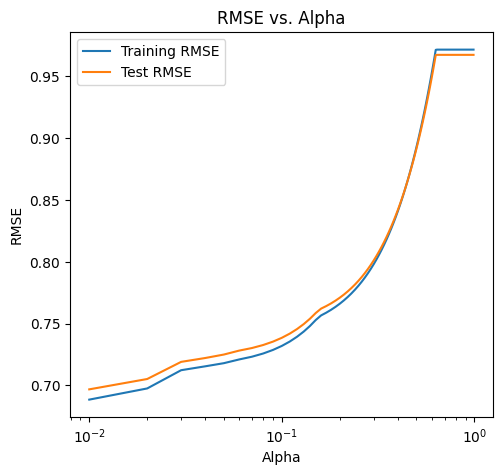

In [19]:
# RMSE vs. alpha
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Plotting RMSE for Training and Test Data
plt.plot(Coefficients['alpha'], Coefficients['RMSE_train'], label='Training RMSE')
plt.plot(Coefficients['alpha'], Coefficients['RMSE_test'], label='Test RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha')
plt.legend()

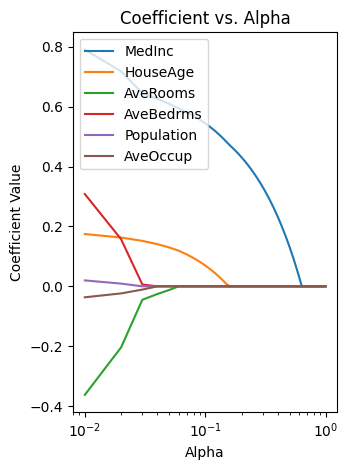

In [20]:
# Coefficient vs. alpha
plt.subplot(1, 2, 2)

# Plotting Coefficients for Each Feature
for feature in X.columns:
    plt.plot(Coefficients['alpha'], Coefficients[feature], label=feature)

plt.xscale('log')  # Log scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficient vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# fit the Ridge Regression
ridge = Ridge(alpha=0.00001)
ridge.fit(X_train_znorm, y_train)

# Compare Coefficients
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train_znorm, y_train)

# Show Coefficients for Both Lasso & Ridge
print(f"RIDGE COEFFICIENTS: {ridge.coef_}")
print(f"LASSO COEFFICIENTS: {lasso.coef_}")

# Compare Predicted Test Labels (y_hat for test)
y_hat_ridge = ridge.predict(X_test_znorm)
y_hat_lasso = lasso.predict(X_test_znorm)

comp_results = np.allclose(y_hat_ridge, y_hat_lasso)
print(f"\nARE RIDGE & LASSO MODELS PRACTICALLY IDENTICAL: {comp_results}")
print("\nI think they look practically identical even though np.allcose shows False\n\n")

RIDGE COEFFICIENTS: [ 0.86314877  0.18622826 -0.52147184  0.45949572  0.03035613 -0.04958286]
LASSO COEFFICIENTS: [ 0.86307543  0.18621667 -0.52131153  0.45934326  0.03034554 -0.0495699 ]

ARE RIDGE & LASSO MODELS PRACTICALLY IDENTICAL: False

I think they look practically identical even though np.allcose shows False




In [23]:
# Determine alpha_values
alpha_values = np.power(2., np.arange(1., 25., 1.))

# The alpha column contains the values we want to iterate over
# The other columns are for storing the coefficients of the ridge regressions
Coefficients = pd.DataFrame(data=alpha_values, columns=['alpha'])
Coefficients[list(X.columns) + ['RMSE_train', 'RMSE_test']] = np.nan

In [24]:
# Iterate Over Alpha Values
for alpha in alpha_values:

    # instantiate a ridge regression with alpha
    ridge = Ridge(alpha=alpha)

    # fit the ridge regression
    ridge.fit(X_train_znorm, y_train)

    # add the coefficients to the DataFrame row
    Coefficients.loc[Coefficients['alpha'] == alpha, list(X.columns)] = ridge.coef_

    # predict training labels (y_hat for training)
    y_hat_train = ridge.predict(X_train_znorm)

    # determine training error metric (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))

    # add the training error metric (RMSE) to the DataFrame row
    Coefficients.loc[Coefficients['alpha'] == alpha, 'RMSE_train'] = rmse_train

    # predict test labels (y_hat for test)
    y_hat_test = ridge.predict(X_test_znorm)

    # determine test error metric (RMSE)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

    # add the test error metric (RMSE) to the DataFrame row
    Coefficients.loc[Coefficients['alpha'] == alpha, 'RMSE_test'] = rmse_test
    
print(Coefficients)
Coefficients.head(10)

         alpha    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0          2.0  0.862633  0.186221 -0.520392   0.458492    0.030377 -0.049564   
1          4.0  0.862119  0.186213 -0.519317   0.457491    0.030397 -0.049545   
2          8.0  0.861095  0.186197 -0.517176   0.455501    0.030437 -0.049508   
3         16.0  0.859065  0.186165 -0.512940   0.451561    0.030517 -0.049433   
4         32.0  0.855076  0.186094 -0.504640   0.443843    0.030670 -0.049286   
5         64.0  0.847368  0.185933 -0.488700   0.429023    0.030956 -0.048998   
6        128.0  0.832937  0.185539 -0.459227   0.401633    0.031450 -0.048445   
7        256.0  0.807399  0.184521 -0.408383   0.354425    0.032188 -0.047418   
8        512.0  0.766111  0.181851 -0.330401   0.282161    0.032945 -0.045611   
9       1024.0  0.706941  0.175295 -0.230265   0.189791    0.032892 -0.042631   
10      2048.0  0.631470  0.161281 -0.128216   0.096744    0.030574 -0.038051   
11      4096.0  0.541186  0.

,alpha,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,RMSE_train,RMSE_test
0,2.0,0.862633,0.186221,-0.520392,0.458492,0.030377,-0.049564,0.685480,0.694192
1,4.0,0.862119,0.186213,-0.519317,0.457491,0.030397,-0.049545,0.685480,0.694189
2,8.0,0.861095,0.186197,-0.517176,0.455501,0.030437,-0.049508,0.685482,0.694183
3,16.0,0.859065,0.186165,-0.512940,0.451561,0.030517,-0.049433,0.685488,0.694176
4,32.0,0.855076,0.186094,-0.504640,0.443843,0.030670,-0.049286,0.685511,0.694172
5,64.0,0.847368,0.185933,-0.488700,0.429023,0.030956,-0.048998,0.685599,0.694208
6,128.0,0.832937,0.185539,-0.459227,0.401633,0.031450,-0.048445,0.685911,0.694423
7,256.0,0.807399,0.184521,-0.408383,0.354425,0.032188,-0.047418,0.686919,0.695260
8,512.0,0.766111,0.181851,-0.330401,0.282161,0.032945,-0.045611,0.689680,0.697744
9,1024.0,0.706941,0.175295,-0.230265,0.189791,0.032892,-0.042631,0.695726,0.703382


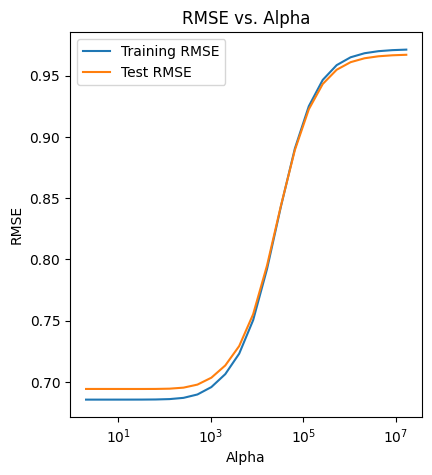

In [25]:
# RMSE vs. alpha
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Plotting RMSE for Training and Test Data
plt.plot(Coefficients['alpha'], Coefficients['RMSE_train'], label='Training RMSE')
plt.plot(Coefficients['alpha'], Coefficients['RMSE_test'], label='Test RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha')
plt.legend()

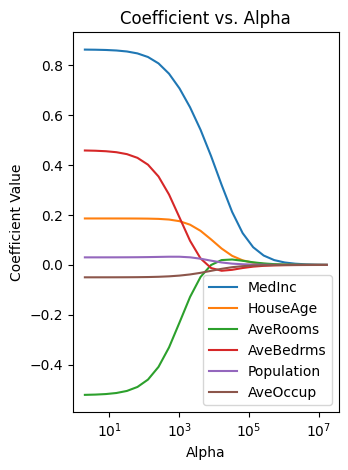

In [26]:
# Coefficient vs. alpha
plt.subplot(1, 2, 2)

# Plotting Coefficients for Each Feature
for feature in X.columns:
    plt.plot(Coefficients['alpha'], Coefficients[feature], label=feature)

plt.xscale('log')  # Log scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficient vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()

**SUMMARY**
<br>Changing alpha in Ridge and Lasso has a profound impact on the coefficients, with Ridge smoothly reducing their magnitudes and Lasso potentially forcing some to zero, leading to a more interpretable and potentially sparser model. The selection of alpha should align with the desired balance between model complexity and predictive performance. For Lasso, some coefficients become exactly zero as alpha increases, leading to feature selection. For Ridge, coefficients gradually approach zero, but rarely become exactly zero. It helps prevent overfitting without feature selection.

<br>For Ridge: alpha=256
<br>For Lasso: alpha=0.04